In [1]:
%matplotlib inline

import pathlib

import numpy as np
import matplotlib.pyplot as plt

from rtlsdr_receiver_flowgraph import rtlsdr_receiver_flowgraph

# Some nice defaults for figures
plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
# Example of how to run the flowgraph
fg = rtlsdr_receiver_flowgraph(duration=3)
fg.run()

gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.6.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
[INFO] [UHD] linux; GNU C++ version 12.2.1 20230211; Boost_108100; UHD_4.4.0.0-0-unknown
ERROR: Unable to create Avahi DNS-SD client :Daemon not running
[ERROR] Unable to scan: -26

Found Rafael Micro R820T/2 tuner
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T/2 tuner
vmcircbuf_sysconfig :info: Using gr::vmcircbuf_sysv_shm_factory
Allocating 15 zero-copy buffers


In [3]:
# We have access to the Vector Sink as a Python object
fg.spectrum_vector_sink

In [4]:
# We can fetch the data
# Documentation:
# https://wiki.gnuradio.org/index.php/Vector_Sink
# https://github.com/gnuradio/gnuradio/blob/main/gr-blocks/include/gnuradio/blocks/vector_sink.h
fg.spectrum_vector_sink.data()

[3.30666184425354,
 2.648062229156494,
 3.3356661796569824,
 3.1213808059692383,
 2.8100922107696533,
 2.9620375633239746,
 3.116367816925049,
 2.7274868488311768,
 3.200254440307617,
 3.3045408725738525,
 3.6666438579559326,
 4.963955402374268,
 5.682453155517578,
 4.7101731300354,
 3.4434144496917725,
 3.5444910526275635,
 4.0391693115234375,
 2.981863260269165,
 2.5952374935150146,
 3.4653494358062744,
 3.2429587841033936,
 2.347010374069214,
 2.6056180000305176,
 3.0897295475006104,
 2.497161626815796,
 3.0118072032928467,
 3.444488286972046,
 4.130929946899414,
 3.7359652519226074,
 4.087278842926025,
 4.347860336303711,
 4.969505310058594,
 4.932804584503174,
 4.250871181488037,
 3.977365493774414,
 4.890902042388916,
 3.751295328140259,
 3.8085920810699463,
 4.796787261962891,
 4.160164833068848,
 3.713411569595337,
 3.2882091999053955,
 4.061878204345703,
 3.4174489974975586,
 3.2363274097442627,
 2.8892664909362793,
 2.9997684955596924,
 3.038116931915283,
 3.4089865684509277,

In [5]:
# Convert spectrum sink data to a numpy array
spectrum = np.array(fg.spectrum_vector_sink.data()).reshape(-1, fg.nfft)
spectrum.shape

(2, 65536)

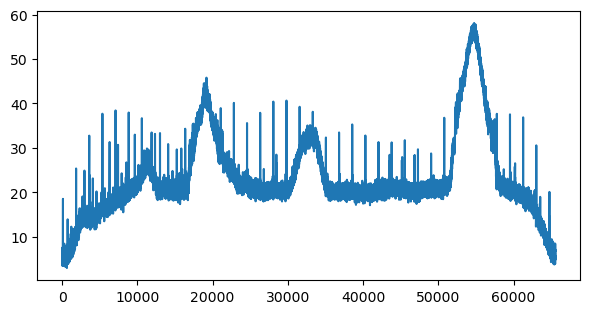

In [6]:
plt.plot(10 * np.log10(spectrum[0]))

In [7]:
# Destroy the flowgraph to release access to the RTL-SDR
del fg

In [8]:
# An example "observation"

frequencies_to_scan = [98e6, 95.5e6, 117.5e6, 425e6, 801e6, 935e6, 1090e6]
freq_xlating_freqs = [800e3, 300e3, -200e3, -250e3, 300e3, 200e3, 0]
duration = 10

spectrum_data = {}
output_dir = pathlib.Path('/tmp/observation')
output_dir.mkdir(exist_ok=True)

for rf_freq, xlating_freq in zip(frequencies_to_scan, freq_xlating_freqs):
    print(f'Receiving on {rf_freq * 1e-6:.3f} MHz (tune to {xlating_freq*1e-3:.1f} kHz)')
    iq_file = str(output_dir / f'iq_data_{rf_freq * 1e-6:.3f}MHz_2.4Msps.c64')
    fg = rtlsdr_receiver_flowgraph(
        duration=duration, frequency=rf_freq, freq_xlating_frequency=xlating_freq,
        iq_file_output=iq_file)
    fg.run()
    spectrum_data[rf_freq] = np.array(fg.spectrum_vector_sink.data()).reshape(-1, fg.nfft)
    del fg

Receiving on 98.000 MHz (tune to 800.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.6.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
ERROR: Unable to create Avahi DNS-SD client :Daemon not running
[ERROR] Unable to scan: -26

Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T/2 tuner
Allocating 15 zero-copy buffers


Receiving on 95.500 MHz (tune to 300.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.6.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
ERROR: Unable to create Avahi DNS-SD client :Daemon not running
[ERROR] Unable to scan: -26

Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T/2 tuner
Allocating 15 zero-copy buffers


Receiving on 117.500 MHz (tune to -200.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.6.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
ERROR: Unable to create Avahi DNS-SD client :Daemon not running
[ERROR] Unable to scan: -26

Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T/2 tuner
Allocating 15 zero-copy buffers


Receiving on 425.000 MHz (tune to -250.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.6.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
ERROR: Unable to create Avahi DNS-SD client :Daemon not running
[ERROR] Unable to scan: -26

Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T/2 tuner
Allocating 15 zero-copy buffers


Receiving on 801.000 MHz (tune to 300.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.6.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
ERROR: Unable to create Avahi DNS-SD client :Daemon not running
[ERROR] Unable to scan: -26

Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T/2 tuner
Allocating 15 zero-copy buffers


Receiving on 935.000 MHz (tune to 200.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.6.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
ERROR: Unable to create Avahi DNS-SD client :Daemon not running
[ERROR] Unable to scan: -26

Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T/2 tuner
Allocating 15 zero-copy buffers


Receiving on 1090.000 MHz (tune to 0.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.6.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
ERROR: Unable to create Avahi DNS-SD client :Daemon not running
[ERROR] Unable to scan: -26

Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T/2 tuner
Allocating 15 zero-copy buffers


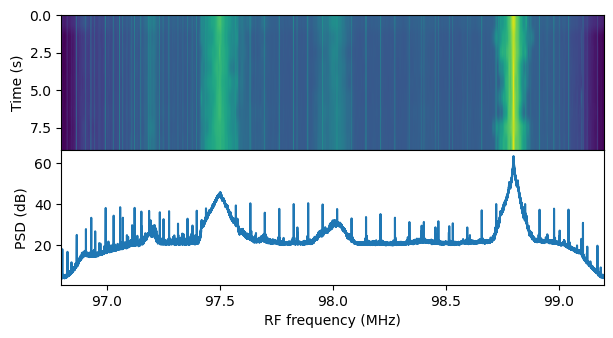

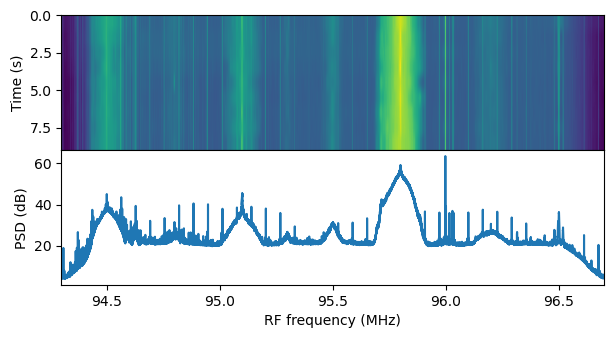

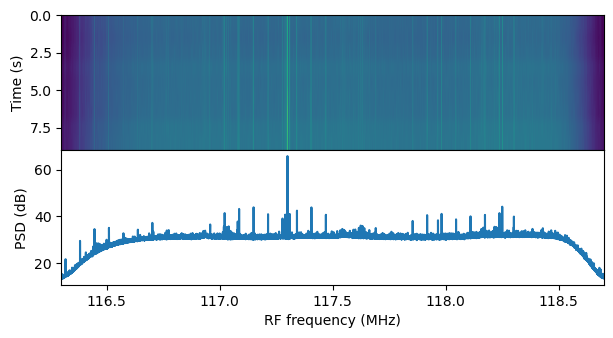

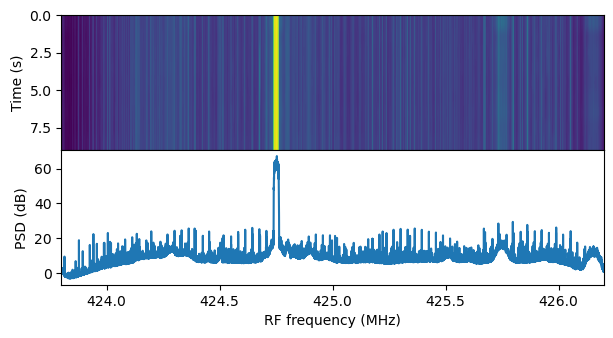

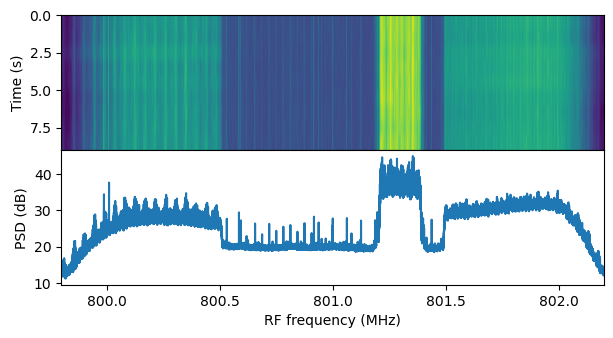

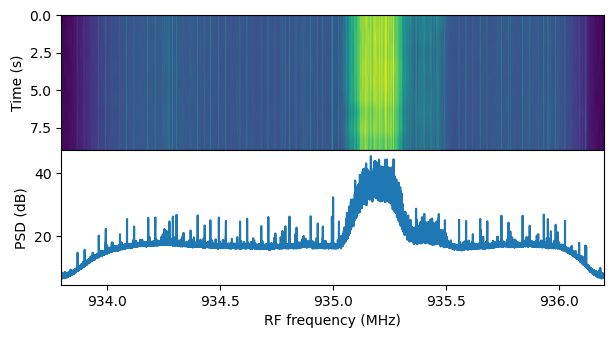

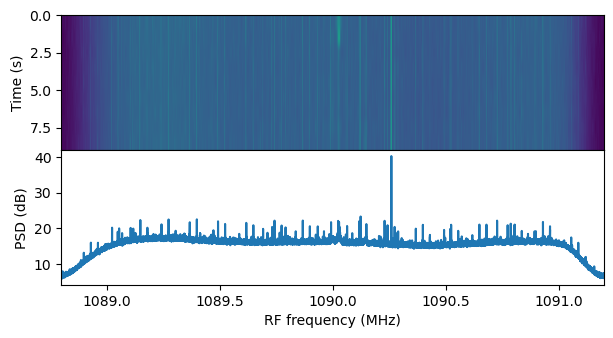

In [9]:
# Display the results
samp_rate = 2.4e6
waterfall_freq_reduce = 64
for freq, data in spectrum_data.items():  
    freq_axis = np.fft.fftshift(np.fft.fftfreq(data.shape[1], 1 / samp_rate))
    fig, axs = plt.subplots(2, 1, sharex=True)
    waterfall = np.max(data.reshape(data.shape[0], -1, waterfall_freq_reduce), axis=-1)
    axs[0].imshow(10*np.log10(waterfall), aspect='auto',
                  extent=[1e-6 * (freq - samp_rate/2), 1e-6 * (freq + samp_rate/2),
                          data.shape[0], 0])
    axs[1].plot(1e-6 * (freq_axis + freq), 10*np.log10(np.average(data, axis=0)))
    plt.subplots_adjust(hspace=0)
    axs[1].set_xlabel('RF frequency (MHz)')
    axs[1].set_ylabel('PSD (dB)')
    axs[0].set_ylabel('Time (s)')